Импортируйте библиотеку pandas как pd. Загрузите два датасета user_data и logs. 
Проверьте размер таблицы, типы переменных.

# Описание данных

user_data:

client – идентификатор пользователя

premium – является ли клиент премиум

age – возраст

logs:

client – идентификатор пользователя

success – результат (успех - 1, нет - 0)

platform – платформа

time – время в формате Unix




In [3]:
import pandas as pd

In [27]:
df_user_data = pd.read_csv('3_user_data.csv',
                 encoding='windows-1251', sep=',')

In [28]:
df_logs = pd.read_csv('3_logs.csv',
                 encoding='windows-1251', sep=',')

In [29]:
df_user_data.head()

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49


In [30]:
df_logs.head()

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629


In [31]:
df_user_data.shape

(2954, 3)

In [32]:
df_logs.shape

(4500, 4)

# Задание 1 

Вопрос: Сколько уникальных значений принимает переменная platform?

In [33]:
unique_num = df_logs.nunique()
unique_num

client      4011
success        2
platform       3
time        4376
dtype: int64

# Задание 2

С какой платформы осуществляется наибольшее количество успешных операций? (success == True)


Подсказка: вспомните команды из прошлого занятия 

Название_датафрейма.query('success == True').platform.value_counts()

а еще команда idxmax()

In [44]:
df_logs.query('success == True').platform.value_counts().idxmax()


'phone'

# Задание 3

Какой клиент совершил больше всего успешных операций?

Внимание: Несколько пользователей могли совершить одинаковое число успешных действий

Подсказка: вспомните команды из прошлого урока 

Название_датафрейма.query('success == True').client.value_counts()

также поможет команда max()

In [85]:
success_client = df_logs.query('success == True').client.value_counts()
success_client


client
61473    41
78349    41
36165    41
61468    41
92584    41
         ..
50300     1
51575     1
3553      1
502       1
11983     1
Name: count, Length: 2845, dtype: int64

In [79]:
success_counts = df_logs.loc[df_logs.success == True].client.value_counts()
max_num = success_counts.max()
max_success_users = success_counts.loc[success_counts == max_num]
max_success_users

client
61473    41
78349    41
36165    41
61468    41
92584    41
28719    41
82563    41
52870    41
12179    41
Name: count, dtype: int64

# Задание 4

Объедините два датафрейма в один по столбцу 'client'

Подсказка: Название_датафрейма_1.merge(Название_датафрейма_2, on='client')

In [53]:
full_data = df_user_data.merge(df_logs, on='client')
full_data

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


# Задание 5

Какая платформа наиболее популярна среди премиумных клиентов? (premium == True)

In [56]:
full_data.query('premium == True').platform.value_counts().idxmax()

'phone'

# Задание 6

Сделайте выборку для премиальных клиентов (premium` == True) и для непримеальных.

На основе этих выборок постройте графики, первый - отображающий популярность использования различных платформ (столбец "platform") у премиальных пользователей и второй - платформы сради непримиальных пользователей. 

Подсказка: используйте sns.countplot(x=название_выборки["столбец"])

In [89]:
premium = full_data.query('premium == True').platform.value_counts()
premium

platform
phone       246
computer    150
tablet       24
Name: count, dtype: int64

In [90]:
no_premium = full_data.query('premium == True').platform.value_counts()
no_premium

platform
phone       246
computer    150
tablet       24
Name: count, dtype: int64

In [94]:
import seaborn as sns

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

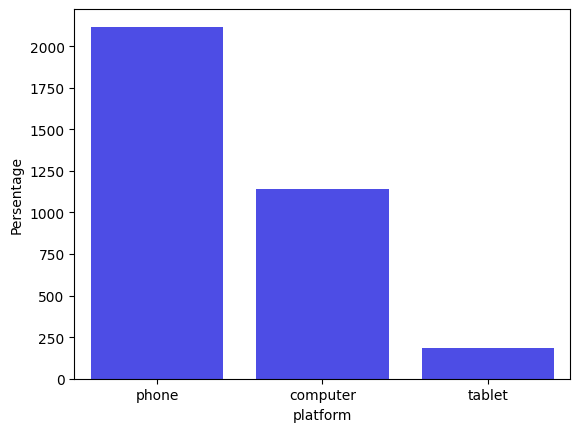

In [97]:
popular = sns.countplot(x = 'platform', data = full_data, color = 'blue', alpha = 0.8)
popular.set(xlabel = 'platform', ylabel = 'Persentage')
sns.despine

# Задание 7

Визуализируйте число успешных операций, сделанных на платформе computer, в зависимости от возраста, используя sns.countplot. По оси x – возраст, y – число успешных операций. 

Если размер графика получается небольшим, можно добавить plt.figure(figsize=(12, 8)) в начало соответствующей ячейки.

Подсказка: sns.countplot(data=Название_Датафрейма.loc[(Название_Датафрейма.platform == 'computer')
                                   & (Название_Датафрейма.success == True)], x='age')

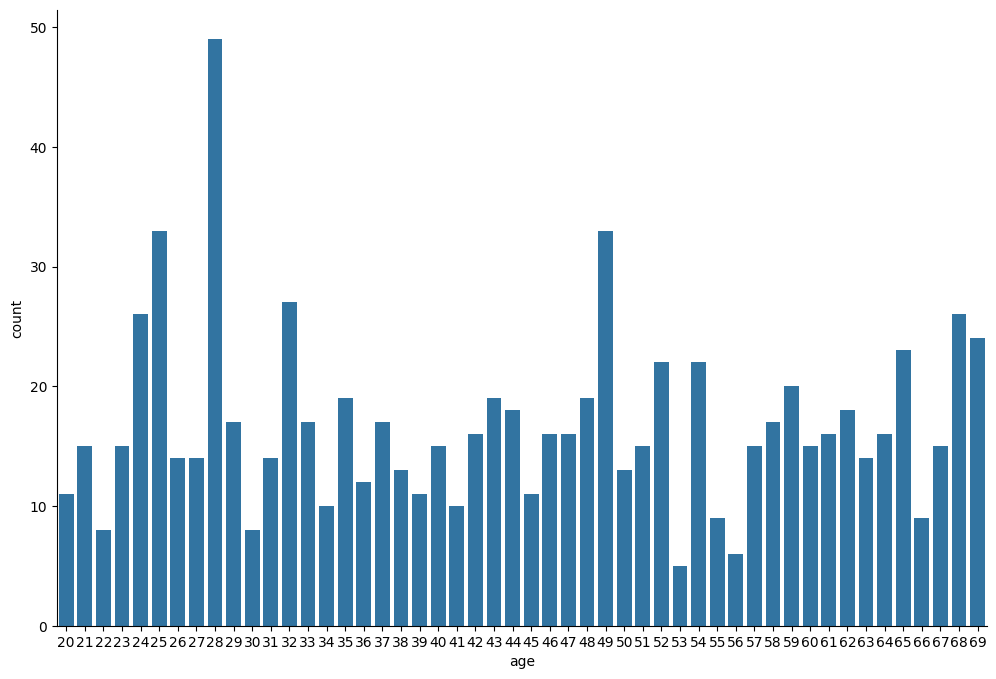

In [107]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
sns.countplot(data=full_data.loc[(full_data.platform == 'computer')
                                   & (full_data.success == True)], 
             x='age')
sns.despine()